## Experiment 10
Calculate Ri with couples of attributes

In [22]:
import deepmatcher as dm
from utilities_functions.intermediate_layer_extraction import return_layer_input_output
import torch
import pandas as pd

In [2]:
hybrid_model = dm.MatchingModel(attr_summarizer='hybrid')
hybrid_model.load_state('models/hybrid2.pth')
hybrid_model.cuda()

MatchingModel(
  (attr_summarizers): ModuleMap(
    (Song_Name): Hybrid(
      (word_contextualizer): RNN(
        (rnn_groups): ModuleList(
          (0): GRU(300, 150, batch_first=True, bidirectional=True)
        )
        (dropouts): ModuleList(
          (0): Dropout(p=0)
        )
        (bypass_networks): ModuleList(
          (0): None
        )
        (input_dropout): NoMeta(
          (module): Dropout(p=0)
        )
      )
      (word_comparator): Attention(
        (alignment_networks): ModuleList(
          (0): AlignmentNetwork(
            (transform): Transform(
              (transforms): ModuleList(
                (0): Linear(in_features=300, out_features=300, bias=True)
                (1): Linear(in_features=300, out_features=300, bias=True)
              )
              (bypass_networks): ModuleList(
                (0): Bypass(
                  (highway_gate): Linear(in_features=300, out_features=300, bias=True)
                )
                (1): Bypass(


In [9]:
attributes = ['Song_Name','Artist_Name','Album_Name','Genre','Price','CopyRight','Time','Released']

In [18]:
attributes_sets = [['Artist_Name','Genre'],['Artist_Name','Song_Name'],['CopyRight','Genre'],['Artist_Name','Album_Name']]

In [11]:
neg_classifier_inputs,neg_classifier_outputs,neg_ids = return_layer_input_output('sample_data/itunes-amazon/'
                                                                         ,'test_negatives.csv',32,hybrid_model,
                                                                        hybrid_model.classifier)

In [12]:
pos_classifier_inputs,pos_classifier_outputs,pos_ids = return_layer_input_output('sample_data/itunes-amazon/',
                                                                       'test_positives.csv',32,hybrid_model,
                                                                       hybrid_model.classifier)

In [13]:
negative_classifier_inputs = list(map(lambda x: x[0],neg_classifier_inputs))
positive_classifier_inputs = list(map(lambda x: x[0],pos_classifier_inputs))

In [14]:
from utilities_functions.ri_calculator import find_smallest_variation_to_change

In [20]:
attribute_lenght= len(attributes)

current_sample = 0
#each column of this matrix is related to a specific attribute
negatives_ri_matrix = []
for batch in negative_classifier_inputs:
    for index in range(len(batch)):
        current_sample_ris = []
        for attributes_set in attributes_sets:
            print('Processing sample {} on attributes {}'.format(current_sample,attributes_set))
            attribute_indexes = []
            for att in attributes_set:
                attribute_indexes.append(attributes.index(att))
            it,variation = find_smallest_variation_to_change(hybrid_model.classifier,1200,150,batch,index,
                                                             attribute_indexes,1)
            current_sample_ris.append(variation)
        negatives_ri_matrix.append(current_sample_ris)
        current_sample+=1

Processing sample 0 on attributes ['Artist_Name', 'Genre']
Processing sample 0 on attributes ['Artist_Name', 'Song_Name']
Processing sample 0 on attributes ['CopyRight', 'Genre']
Processing sample 0 on attributes ['Artist_Name', 'Album_Name']
Processing sample 1 on attributes ['Artist_Name', 'Genre']
Processing sample 1 on attributes ['Artist_Name', 'Song_Name']
Processing sample 1 on attributes ['CopyRight', 'Genre']
Processing sample 1 on attributes ['Artist_Name', 'Album_Name']
Processing sample 2 on attributes ['Artist_Name', 'Genre']
Processing sample 2 on attributes ['Artist_Name', 'Song_Name']
Processing sample 2 on attributes ['CopyRight', 'Genre']
Processing sample 2 on attributes ['Artist_Name', 'Album_Name']
Processing sample 3 on attributes ['Artist_Name', 'Genre']
Processing sample 3 on attributes ['Artist_Name', 'Song_Name']
Processing sample 3 on attributes ['CopyRight', 'Genre']
Processing sample 3 on attributes ['Artist_Name', 'Album_Name']
Processing sample 4 on attri

Processing sample 33 on attributes ['CopyRight', 'Genre']
Processing sample 33 on attributes ['Artist_Name', 'Album_Name']
Processing sample 34 on attributes ['Artist_Name', 'Genre']
Processing sample 34 on attributes ['Artist_Name', 'Song_Name']
Processing sample 34 on attributes ['CopyRight', 'Genre']
Processing sample 34 on attributes ['Artist_Name', 'Album_Name']
Processing sample 35 on attributes ['Artist_Name', 'Genre']
Processing sample 35 on attributes ['Artist_Name', 'Song_Name']
Processing sample 35 on attributes ['CopyRight', 'Genre']
Processing sample 35 on attributes ['Artist_Name', 'Album_Name']
Processing sample 36 on attributes ['Artist_Name', 'Genre']
Processing sample 36 on attributes ['Artist_Name', 'Song_Name']
Processing sample 36 on attributes ['CopyRight', 'Genre']
Processing sample 36 on attributes ['Artist_Name', 'Album_Name']
Processing sample 37 on attributes ['Artist_Name', 'Genre']
Processing sample 37 on attributes ['Artist_Name', 'Song_Name']
Processing s

Processing sample 67 on attributes ['Artist_Name', 'Song_Name']
Processing sample 67 on attributes ['CopyRight', 'Genre']
Processing sample 67 on attributes ['Artist_Name', 'Album_Name']
Processing sample 68 on attributes ['Artist_Name', 'Genre']
Processing sample 68 on attributes ['Artist_Name', 'Song_Name']
Processing sample 68 on attributes ['CopyRight', 'Genre']
Processing sample 68 on attributes ['Artist_Name', 'Album_Name']
Processing sample 69 on attributes ['Artist_Name', 'Genre']
Processing sample 69 on attributes ['Artist_Name', 'Song_Name']
Processing sample 69 on attributes ['CopyRight', 'Genre']
Processing sample 69 on attributes ['Artist_Name', 'Album_Name']
Processing sample 70 on attributes ['Artist_Name', 'Genre']
Processing sample 70 on attributes ['Artist_Name', 'Song_Name']
Processing sample 70 on attributes ['CopyRight', 'Genre']
Processing sample 70 on attributes ['Artist_Name', 'Album_Name']
Processing sample 71 on attributes ['Artist_Name', 'Genre']
Processing s

In [21]:
ri_norms_negative_samples = []
for ri_list in negatives_ri_matrix:
    ri_norms_negative_samples.append(list(map(lambda x:torch.norm(x).data[0],ri_list)))

In [28]:
ri_norms_negative_samples[0]

[3.7652242183685303, 1.9860656261444092, 3.755464553833008, 2.5734193325042725]

In [30]:
variation_df = pd.DataFrame(data= ri_norms_negative_samples,columns=['c1','c2','c3','c4'])
ri_sums_negatives = variation_df.sum(numeric_only=True)

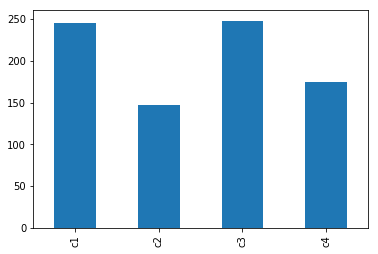

In [32]:
ri_sums_negatives.plot.bar()

In [41]:
attribute_lenght= len(attributes)

current_sample = 0
#each column of this matrix is related to a specific attribute
positives_ri_matrix = []
for batch in positive_classifier_inputs:
    for index in range(len(batch)):
        current_sample_ris = []
        for attributes_set in attributes_sets:
            print('Processing sample {} on attributes {}'.format(current_sample,attributes_set))
            attribute_indexes = []
            for att in attributes_set:
                attribute_indexes.append(attributes.index(att))
            it,variation = find_smallest_variation_to_change(hybrid_model.classifier,1200,150,batch,index,
                                                             attribute_indexes,0)
            current_sample_ris.append(variation)
        positives_ri_matrix.append(current_sample_ris)
        current_sample+=1

Processing sample 0 on attributes ['Artist_Name', 'Genre']
Processing sample 0 on attributes ['Artist_Name', 'Song_Name']
Processing sample 0 on attributes ['CopyRight', 'Genre']
Processing sample 0 on attributes ['Artist_Name', 'Album_Name']
Processing sample 1 on attributes ['Artist_Name', 'Genre']
Processing sample 1 on attributes ['Artist_Name', 'Song_Name']
Processing sample 1 on attributes ['CopyRight', 'Genre']
Processing sample 1 on attributes ['Artist_Name', 'Album_Name']
Processing sample 2 on attributes ['Artist_Name', 'Genre']
Processing sample 2 on attributes ['Artist_Name', 'Song_Name']
Processing sample 2 on attributes ['CopyRight', 'Genre']
Processing sample 2 on attributes ['Artist_Name', 'Album_Name']
Processing sample 3 on attributes ['Artist_Name', 'Genre']
Processing sample 3 on attributes ['Artist_Name', 'Song_Name']
Processing sample 3 on attributes ['CopyRight', 'Genre']
Processing sample 3 on attributes ['Artist_Name', 'Album_Name']
Processing sample 4 on attri

In [42]:
ri_norms_positive_samples = []
for ri_list in positives_ri_matrix:
    ri_norms_positive_samples.append(list(map(lambda x:torch.norm(x).data[0],ri_list)))

In [43]:
variation_df = pd.DataFrame(data= ri_norms_positive_samples,columns=['c1','c2','c3','c4'])

,c1,c2,c3,c4
0,2.458063,1.306391,2.489593,1.342675
1,4.553824,2.402345,5.256277,3.096399
2,12.180706,6.691146,12.284346,7.639979
3,10.582112,5.786171,11.319215,6.796115
4,1.854842,1.237541,1.887043,1.274662
5,9.789618,5.154216,10.507800,6.634055
6,13.184972,6.837037,13.339219,8.354078
7,11.554967,6.067842,12.212656,7.564464
8,4.728325,2.491878,5.486115,3.207528
9,1.248575,0.670808,1.774135,1.198508


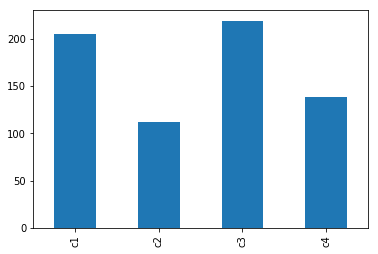

In [44]:
ri_sums = variation_df.sum(numeric_only=True)
ri_sums.plot.bar()